# Baseline Ensemble Methods - Target: Considered Suicide


## Import Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier


pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

In [4]:
# Read in data and split data to be used in the models
df = pd.read_csv('modeling_dataset.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

print(df.shape)
df.head()

(53548, 60)


,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
0,2019.0,7.0,5.0,2.0,2.0,1.63,54.89,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,2.0,4.0,1.0,46.882141,1.6659,213.0,57923.0,0.0,1.0,1.0
1,2019.0,8.0,4.0,2.0,2.0,1.60,53.98,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,62.232194,1.3851,213.0,57923.0,0.0,1.0,1.0
2,2019.0,8.0,4.0,1.0,2.0,1.68,43.09,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,1.0,0.590171,1.4958,213.0,57923.0,0.0,1.0,0.0
3,2019.0,5.0,4.0,2.0,2.0,1.78,68.95,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,5.0,3.0,7.0,7.0,4.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,7.0,7.0,2.0,3.0,4.0,3.0,69.786634,1.7114,213.0,57923.0,1.0,1.0,0.0
4,2019.0,6.0,5.0,2.0,2.0,1.78,58.97,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,4.0,2.0,2.0,2.0,1.0,16.739994,1.6659,213.0,57923.0,0.0,1.0,0.0


In [5]:
# Create matrix of features
to_drop = ['Considered suicide','Made a suicide plan','Attempted suicide','Injurious suicide attempt']
X = df.drop(columns = to_drop, axis = 1) # grabs everything else but target

# Create target variable
y = df['Considered suicide'] # y is the column we're trying to predict


In [6]:
X.describe()

,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
count,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,5.354800e+04,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000
mean,2014.679092,5.126653,5.087286,1.481829,2.480541,1.688293,67.017479,4.352338,1.388493,1.519328,1.408661,1.103533,1.109715,1.141219,1.520169,1.138156,1.927374,1.811291,1.854560,1.677990,1.671080,2.055726,1.348248,1.173527,1.217394,3.429316,1.576417,2.541570,2.324419,2.699186,1.572085,1.057444,1.018152,1.766359,1.571917,2.992007,2.145346,1.896934,1.786341,1.606876,2.300627,3.206488,2.021831,3.443079,4.081889,1.991111,1.821506,3.656439,1.109416,6.213372e+01,1.082591,164.717002,264860.247479,0.220662,0.945003,0.752783
std,2.815448,1.510659,1.228198,0.499674,1.121861,0.098875,16.683080,0.939576,0.914615,0.702596,1.094574,0.584567,0.498348,0.727962,1.216012,0.613862,0.259525,0.391281,0.352547,0.467251,0.469825,1.884897,1.184557,0.870642,0.851894,2.188578,1.070177,2.454069,2.050970,2.191601,1.282910,0.444195,0.177988,0.423150,0.494806,2.505909,1.773185,1.278619,0.933065,0.763048,1.805916,0.779903,1.163381,1.808349,2.097703,0.441633,0.470584,1.307949,0.538331,2.784126e+01,0.941813,50.440779,178287.459596,0.414697,0.227977,0.431398
min,2011.000000,1.000000,1.000000,1.000000,1.000000,1.270000,24.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.039970e-08,0.028600,101.000000,10530.000000,0.000000,0.000000,0.000000
25%,2013.000000,5.000000,4.000000,1.000000,1.000000,1.630000,56.700000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.429519e+01,0.463000,104.000000,88352.000000,0.000000,1.000000,1.000000
50%,2015.000000,5.000000,5.000000,1.000000,2.000000,1.680000,62.600000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

### Creating Dummy Variables for Categorical Data

In [7]:
# #Turn all features into object types
# X = X.astype('object')

In [8]:
# #Return columns below into numneri dtype
# cols = ['How tall are you', 'How much do you weigh', 'BMIPCT', 'weight', 'stratum','psu']
# X[cols] = X[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
# #Dummify columns containing object dtypes
# obj = X.select_dtypes(exclude=['float']).columns

# dummy_obj = pd.get_dummies(X[obj],drop_first=False)

In [10]:
# #Drop 
# X.drop(obj,axis=1,inplace=True)

# X = pd.concat([X,dummy_obj],axis=1)

# print(X.shape)
# X.head()

In [11]:
# print(y.value_counts())
# print('--------------------')
# print(y.value_counts(normalize=True))

## Train-Test-Split

In [12]:
# Use x and y variables to split the training data into train and test set then scale that data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Taking Care of Class imbalance with SMOTE

In [13]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())
print('--------------------')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Synthetic sample class distribution: 

1.0    33069
2.0    33069
Name: Considered suicide, dtype: int64
--------------------
1.0    0.5
2.0    0.5
Name: Considered suicide, dtype: float64


## Fit Gradient Boosted Trees

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

## Fit a KNN model

In [31]:
# from sklearn.neighbors import KNeighborsClassifier

In [32]:
# knn = KNeighborsClassifier(n_neighbors=10)

In [35]:
# knn.fit(X_train_resampled, y_train_resampled)

# knn_preds = knn.predict(X_test)

# knn_f1 = metrics.f1_score(y_test, knn_preds)
# knn_acc = metrics.accuracy_score(y_test, knn_preds)

# print(knn_f1)
# print(knn_acc)

0.45044826750666345
0.6611638156420407


[[1859  420]
 [4116 6992]]
              precision    recall  f1-score   support

         1.0       0.31      0.82      0.45      2279
         2.0       0.94      0.63      0.76     11108

    accuracy                           0.66     13387
   macro avg       0.63      0.72      0.60     13387
weighted avg       0.84      0.66      0.70     13387

Accuracy: 0.6611638156420407
Precision: 0.3111297071129707
Recall: 0.8157086441421676
F1: 0.45044826750666345
ROC-AUC: 0.7225824459457687
0.695771288218936


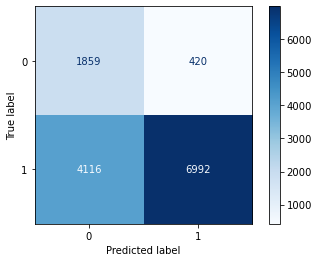

In [40]:
# from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# from sklearn.model_selection import cross_val_score


# # Confusion matrix and classification report
# print(confusion_matrix(y_test, knn_preds))
# print(classification_report(y_test, knn_preds))

# print('Accuracy:', metrics.accuracy_score(y_test, knn_preds))
# print('Precision:', metrics.precision_score(y_test, knn_preds))
# print('Recall:', metrics.recall_score(y_test, knn_preds))
# print('F1:', metrics.f1_score(y_test, knn_preds))
# print('ROC-AUC:', metrics.roc_auc_score(y_test, knn_preds))

# #cross validation score
# score = cross_val_score(knn, X, y, cv = 10)
# print(score.mean())


# # classes= ['Yes', 'No']
# cm = confusion_matrix(y_test, knn_preds )
# # print(cm)


# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# disp.plot(cmap='Blues')
# plt.show()

In [ ]:
# #ROC Curve
# fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_preds)
# plt.plot(fpr, tpr)
# plt.show()

In [2]:
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# from sklearn.model_selection import cross_val_score


# # Confusion matrix and classification report
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Precision:', metrics.precision_score(y_test, y_pred))
# print('Recall:', metrics.recall_score(y_test, y_pred))
# print('F1:', metrics.f1_score(y_test, y_pred))


# #cross validation score
# score = cross_val_score(ctree, X, y, cv = 10)
# print(score.mean())


# classes= ['Yes', 'No']
# cm = confusion_matrix(y_test, y_pred, )
# print(cm)


# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# disp.plot(cmap='Blues')
# plt.show()

## Fit a Logistic Regression model 

In [16]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [37]:
# from sklearn.linear_model import LogisticRegression

In [38]:
# lr = LogisticRegression(class_weight='balanced')

In [39]:
# lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced')

In [40]:
# lr_preds = lr.predict(X_test)

# lr_f1 = metrics.f1_score(y_test, lr_preds)

# print(lr_f1)

0.5569306930693069


In [ ]:
# # Confusion matrix and classification report
# print(confusion_matrix(y_test, lr_preds))
# print(classification_report(y_test, lr_preds))

# print('Accuracy:', metrics.accuracy_score(y_test, lr_preds))
# print('Precision:', metrics.precision_score(y_test, lr_preds))
# print('Recall:', metrics.recall_score(y_test, lr_preds))
# print('F1:', metrics.f1_score(y_test, lr_preds))
# print('ROC-AUC:', metrics.roc_auc_score(y_test, lr_preds))

# #cross validation score
# score = cross_val_score(lr, X, y, cv = 10)
# print(score.mean())


# # classes= ['Yes', 'No']
# cm = confusion_matrix(y_test, lr_preds)
# # print(cm)


# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# disp.plot(cmap='Blues')
# plt.show()

## Fit a Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create matrix of features
to_drop = ['Considered suicide','Made a suicide plan','Attempted suicide','Injurious suicide attempt']
X = df.drop(columns = to_drop, axis = 1) # grabs everything else but target

# Create target variable
y = df['Considered suicide'] # y is the column we're trying to predict

In [17]:
# X.dtypes

In [18]:
# Use x and y variables to split the training data into train and test set then scale that data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

Handling class imbalance using SMOTE

In [19]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())
print('--------------------')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Synthetic sample class distribution: 

1.0    33069
2.0    33069
Name: Considered suicide, dtype: int64
--------------------
1.0    0.5
2.0    0.5
Name: Considered suicide, dtype: float64


In [20]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train_resampled, y_train_resampled)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)
dtc_acc = metrics.accuracy_score(y_test, dtc_preds)

print(dtc_f1)
print(dtc_acc)

0.544208120935138
0.8063046238888474


[[1548  731]
 [1862 9246]]


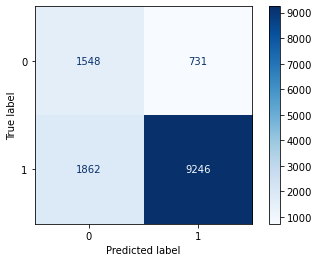

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, dtc_preds)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.show()

## Combine three models using Voting Classifier

In [23]:
from sklearn.ensemble import VotingClassifier


For the estimators, we must provide a list of tuples. The first value in the tuple is is the name given to the model/estimator in the second value. SKlearn requires this because there is additional functionality where you can access information about the specific models, so you need to name the models to access them later.  

In [24]:
voting_clf = VotingClassifier(
                estimators=[('logreg', lr), ('knneighbors', knn), ('decisiontree', dtc)], 
                voting='hard')

voting_clf.fit(X_train_resampled, y_train_resampled)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

print(vc_f1)

NameError: name 'lr' is not defined

### Use a voting classifier with multiple Logistic regression models 

In [ ]:

C_param_range = [0.001,0.01,0.1,1,10]
titles = ['lr_0_001', 'lr_0_01', 'lr_0_1', 'lr_1', 'lr_10']

params = dict(zip(titles, C_param_range)) 
models = {}

table = pd.DataFrame(columns = ['C_parameter','F1'])
table['C_parameter'] = C_param_range
j = 0

for k , v  in params.items():
    
    # Create model using different value for c  
    lr = LogisticRegression(penalty = 'l2', C = v, random_state = 1, class_weight='balanced')
    
    #save the model to a dictionary to use later in our voting classifiers
    models[k]= lr
    
    #the steps below this point are unnecessary in order to create a voting classifier, 
    #but it is easy to fit the model and see how performance changes for different levels of regularization
    lr.fit(X_train_resampled, y_train_resampled)
    
    # Predict using model
    y_preds = lr.predict(X_test)

    # Saving accuracy score in table
    table.iloc[j,1] = metrics.f1_score(y_test, y_preds)
    j += 1



In [ ]:
#review performance for different levels of C
table


In [ ]:
#invesitgate the models D=dictionary
list(models.items())

Now that we have programmatically created multiple logistic regression models, let's use them in an ensemble model

In [ ]:
lr_voting = VotingClassifier(estimators=list(models.items()), 
                              voting='hard')

lr_voting.fit(X_train_resampled, y_train_resampled)

lrv_preds = lr_voting.predict(X_test)

lrv_f1 = metrics.f1_score(y_test, lrv_preds)

print(lrv_f1)

## Fit a Bagging Classifier for a Logistic Regression model. 

In [ ]:
X_train_resampled.shape

In [ ]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(random_state = 1, class_weight='balanced'), 
            n_estimators= 100,
            max_samples= 0.8,
            max_features= 6,
            oob_score= True
                )

In [ ]:
bc_lr.fit(X_train_resampled, y_train_resampled)



In [ ]:
# Use the oob_score to get some idea of how the model performs on a validation set

bc_lr.oob_score_

In [ ]:
# See how the model performs on the test set

bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = metrics.f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

***What is the difference in the `VotingClassifier` algorithm and the `BaggingClassifier` algorithm?***

Your answer:

**What is the difference between a BaggingClassifier that uses a decision tree as the base estimator and a Random Forest Classifier?**

A random forest classifier will take a sample of features at each node, where as a bagging classifier will take a sample of features at to use for the whole model. 

# Fitting a Random Forest Classifier

In [1]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100)

In [26]:
#let's look at all the different default features
rfc

RandomForestClassifier(random_state=1)

In [27]:
#fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

In [28]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.5106075216972034
Test Accuracy score:  0.8483603495928886


[[ 1059  1220]
 [  810 10298]]


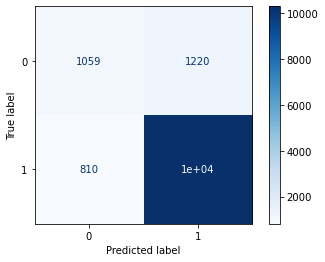

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, rfc_preds)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.show()

***Change the parameters and see whether you can improve the performance of the model***

### GridsearchCV with Random Forest

Let's use grid search to identify the best tuning parameters to use for a random forest model. 

In [32]:
from sklearn.model_selection import GridSearchCV



In [33]:
RandomForestClassifier()



RandomForestClassifier()

In [34]:
#create a dictionary of all the parameters you want to tune
param_grid = { 
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2,10)),
    'max_features': list(range(3,10))
}

In [35]:
#create a grid search object and fit it to the data

grid_tree=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [36]:
grid_tree.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min


KeyboardInterrupt: 

In [ ]:
### Identify the best params 

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)
#Identify the best score during fitting with cross-validation


In [ ]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

# Grid Search and Pipelines

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

We can split the data using stratify to make sure we can get an even split of classes in the train and test set

In [8]:
# Split X and y with even class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

# Random Forest

In [10]:
#Scale the data
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf.score(X_test, y_test)

0.7808988764044944

In [12]:
#Now with cross validation search
val = cross_val_score(RandomForestClassifier(random_state=42),X_train_resampled, y_train_resampled,cv=5)
val.mean()

0.8002954791687186

# Random Forest with Grid Search

In [13]:
#If you were to line up all the possible values of one and of the other, they create a grid

In [14]:
rf_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
    "max_features": [None,4,5,6,9,10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 3, 5, 6],
    "n_estimators" : [10, 30, 100]
}

In [15]:
rf_grid = RandomForestClassifier(random_state=42)
gridsearch = GridSearchCV(rf_grid, rf_param_grid, cv=5, return_train_score=True, n_jobs=-1, verbose=-1)

In [16]:
gridsearch.fit(X_train_resampled, y_train_resampled)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 8704 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 12160 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 14104 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 16192 tasks   

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [None, 4, 5, 6, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 100]},
             return_train_score=True, verbose=-1)

In [17]:
print("Testing Accuracy: {:.4}%".format(gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(gridsearch.best_params_))

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(gridsearch.best_estimator_))

Testing Accuracy: 84.11%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}
Best Model: RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=10, random_state=42)


In [18]:
gridsearch.score(X_test, y_test)

0.8089887640449438

In [19]:
#CV * Number of params to search
5*2*11*6*3*5*3

29700

# Pipelines

In [174]:
# Split X and y with even class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

#Impute age using the training mean
mean_age = X_train.age.mean()
X_train['age'].fillna(mean_age, inplace=True)
X_test['age'].fillna(mean_age, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [175]:
# Create our pipeline by passing a list of tuples with each class and its name in a string
pipeline1 = Pipeline([
                    ('ss',StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=42))
                    ])

In [176]:
# Fit the training data to pipeline
pipeline1.fit(X_train,y_train)

# Print the accuracy on test set
pipeline1.score(X_test,y_test)

0.7808988764044944

# Pipelines with GridSearch

In [177]:
pipeline2 = Pipeline([
                    ('ss',StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=42))
                    ])

In [178]:
# We set the params, but we add a rf__ to each parameter to let it know its on the rf part of the pipeline
rf_param_grid_pipe = {
    "rf__criterion": ["gini", "entropy"],
    "rf__max_depth": [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
    "rf__max_features": [None,4,5,6,9,10],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf" : [1, 2, 3, 5, 6],
    "rf__n_estimators" : [10, 30, 100]
}

In [179]:
# Instanstiate the gridsearch pipeline
grid_search_pipe = GridSearchCV(pipeline2, rf_param_grid_pipe, cv=5, verbose=1, n_jobs=-1, return_train_score=True)


In [180]:
#Fit the grid search to the data
grid_search_pipe.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 5940 candidates, totalling 29700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 19552 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 22452 tasks  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 14,
                                           16],
                         'rf__max_features': [None, 4, 5, 6, 9, 10],
                         'rf__min_samples_leaf': [1, 2, 3, 5, 6],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [10, 30, 100]},
             return_train_score=True, verbose=1)

In [181]:
grid_search_pipe.score(X_test, y_test)

0.8089887640449438

In [182]:

# Single best score achieved across all params (min_samples_split)
print(grid_search_pipe.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_search_pipe.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_search_pipe.best_estimator_)
#Identify the best score during fitting with cross-validation

0.8411110016743819
{'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 5, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 10, 'rf__n_estimators': 10}
Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, max_features=5,
                                        min_samples_leaf=3,
                                        min_samples_split=10, n_estimators=10,
                                        random_state=42))])


In [183]:
#Predictions with grid search
#Predict the response for test dataset
y_pred = grid_search_pipe.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8089887640449438


### Pickling the best Estimator



In [184]:
# pickle list object
 
model_pickle_path = 'best_model.pkl'

#Create a variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(grid_search_pipe.best_estimator_, model_pickle)
model_pickle.close()

# Randomized Search

Randomized Search allows us to search a distribution for each parameter instead of only a desginated value like GridSearch



In [185]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Load in the Iris Dataset and the LogisticRegression class
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
# Set a distribution and options for the different parameters
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
#Fit and check the best parameters
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [186]:
search.score(iris.data, iris.target)

0.98